# Assignment_12 : Build various MLP architectures for MNIST Dataset


In [0]:
#import the libraries
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import MaxPooling2D,Activation
from keras.layers import Dense,Activation,Dropout,BatchNormalization
from keras.initializers import he_normal,RandomNormal
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np


In [0]:
#function to plot the error plots
import matplotlib.pyplot as plt
import seaborn as sn

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
#load the train and test datasets

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
#resize the dataset
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] * x_test.shape[2])

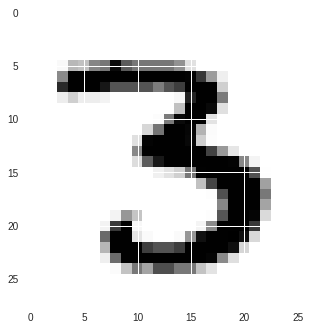

In [0]:
#plot a random datapoint

plt.imshow(x_train[12].reshape(28,28))
plt.show()

In [0]:
#normalize the datapoints X-Xmin / Xmax - Xmin

x_train = x_train / 255
x_test = x_test / 255

In [0]:
#unique label values

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
#convert the discrete labels to binary arrays of len-labels 
print('Label of the first datapoint ',y_train[0])
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
print('Label of the datpoints after encoding ',y_train[0])

Label of the first datapoint  5
Label of the datpoints after encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#mlp parameters

output_dim = 10
input_dim = x_train.shape[1]
batch_size = 512
n_epochs = 20

# Model_1

In [256]:
#2 hidden layer model

model_1 = Sequential()
model_1.add(Dense(500,activation='relu',kernel_initializer='he_uniform',input_dim=input_dim))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(200,activation='relu',kernel_initializer='he_uniform'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(output_dim,activation='softmax'))

#print summary
model_1.summary()
#compile model
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#train the model using batches and validation split 0f 20% and n epochs
hist = model_1.fit(x_train,y_train,batch_size=batch_size,validation_split=0.2,verbose=1,epochs=n_epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_241 (Dense)            (None, 500)               392500    
_________________________________________________________________
batch_normalization_176 (Bat (None, 500)               2000      
_________________________________________________________________
dropout_162 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_242 (Dense)            (None, 200)               100200    
_________________________________________________________________
batch_normalization_177 (Bat (None, 200)               800       
_________________________________________________________________
dropout_163 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_243 (Dense)            (None, 10)                2010      
Total para

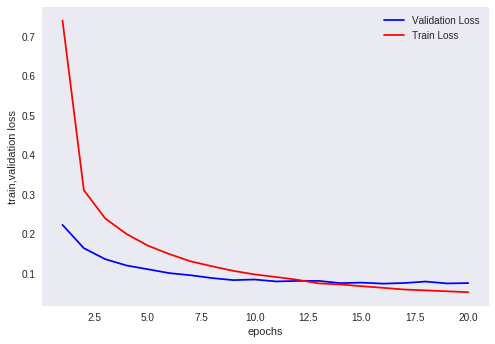

In [257]:
#Train and validation error plot

epochs = list(range(1,n_epochs+1))
fig,ax = plt.subplots(1,1)
val_loss = hist.history['val_loss']
train_loss = hist.history['loss']
ax.set_xlabel('epochs'),ax.set_ylabel('train,validation loss')
plt_dynamic(epochs,val_loss,train_loss,ax)

In [258]:
#Score and accuracy on test data

score = model_1.evaluate(x_test,y_test)
print('Test_Score',score[0])
print('Test_accuray',score[1])

10000/10000 [==============================] - 3s 270us/step
Test_Score 0.0657145360973198
Test_accuray 0.9811


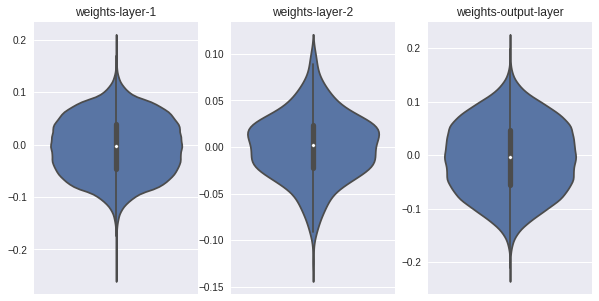

In [264]:
#plot the weights

weights = model_1.get_weights()
w1 = weights[0].flatten().reshape(-1,1)
w2 = weights[3].flatten().reshape(-1,1)
w3 = weights[6].flatten().reshape(-1,1)

plt.figure(1,figsize=(10,5))
plt.subplot(1,3,1)
plt.title('weights-layer-1')
sn.violinplot(y=w1)

plt.subplot(1,3,2)
plt.title('weights-layer-2')
sn.violinplot(y=w2)

plt.subplot(1,3,3)
plt.title('weights-output-layer')
sn.violinplot(y=w3)


plt.show()

# Model_2

In [269]:
#MLP with 3 hidden layers
batch_size = 1024
n_epochs = 10

model_2 = Sequential()

model_2.add(Dense(600,activation='relu',kernel_initializer='he_normal',input_dim=input_dim))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(400,activation='relu',kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
            
model_2.add(Dense(output_dim,activation='softmax'))

#model summary
model_2.summary()

#compile
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#train
hist = model_2.fit(x_train,y_train,batch_size=batch_size,validation_split=0.2,verbose=1,epochs=n_epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_248 (Dense)            (None, 600)               471000    
_________________________________________________________________
batch_normalization_181 (Bat (None, 600)               2400      
_________________________________________________________________
dropout_167 (Dropout)        (None, 600)               0         
_________________________________________________________________
dense_249 (Dense)            (None, 400)               240400    
_________________________________________________________________
batch_normalization_182 (Bat (None, 400)               1600      
_________________________________________________________________
dropout_168 (Dropout)        (None, 400)               0         
_________________________________________________________________
dense_250 (Dense)            (None, 100)               40100     
__________

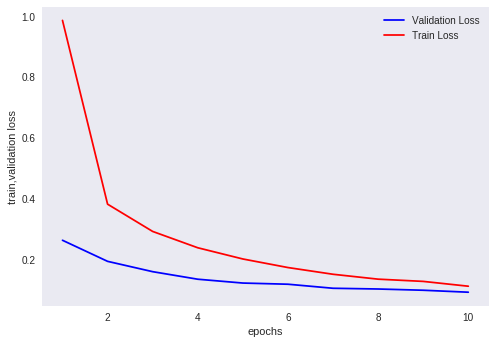

In [270]:
#train and validation error plot

fig,ax = plt.subplots(1,1)
epochs = list(range(1,n_epochs+1))
val_loss = hist.history['val_loss']
train_loss = hist.history['loss']
ax.set_xlabel('epochs'),ax.set_ylabel('train,validation loss')
plt_dynamic(epochs,val_loss,train_loss,ax)

In [271]:
#scores on test data

score = model_2.evaluate(x_test,y_test)
print('Test_Score',score[0])
print('Test_accuray',score[1])

10000/10000 [==============================] - 3s 323us/step
Test_Score 0.08305682018357328
Test_accuray 0.9753


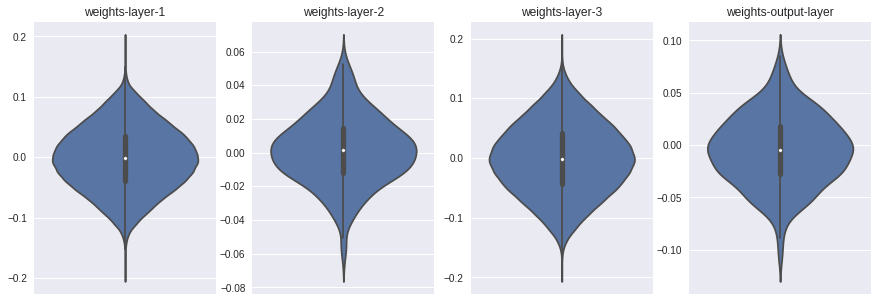

In [272]:
#plot the weights

weights = model_2.get_weights()
w1 = weights[0].flatten().reshape(-1,1)
w2 = weights[3].flatten().reshape(-1,1)
w3 = weights[6].flatten().reshape(-1,1)
w4 = weights[9].flatten().reshape(-1,1)


plt.figure(1,figsize=(15,5))
plt.subplot(1,4,1)
plt.title('weights-layer-1')

sn.violinplot(y=w1)
plt.subplot(1,4,2)
plt.title('weights-layer-2')

sn.violinplot(y=w2)

plt.subplot(1,4,3)
plt.title('weights-layer-3')
sn.violinplot(y=w3)

plt.subplot(1,4,4)
plt.title('weights-output-layer')
sn.violinplot(y=w4)

plt.show()

# Model_3

In [232]:
#model with 5 hidden layers
batch_size = 1024
n_epochs = 20

model_3 = Sequential()

model_3.add(Dense(420,activation='relu',kernel_initializer='he_normal',input_dim=input_dim))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(224,activation='relu',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(126,activation='relu',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(77,activation='relu',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(25,activation='relu',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(output_dim,activation='softmax'))

model_3.summary()

model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

hist = model_3.fit(x_train,y_train,batch_size=batch_size,validation_split=0.2,verbose=1,epochs=n_epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 420)               329700    
_________________________________________________________________
batch_normalization_142 (Bat (None, 420)               1680      
_________________________________________________________________
dropout_133 (Dropout)        (None, 420)               0         
_________________________________________________________________
dense_196 (Dense)            (None, 224)               94304     
_________________________________________________________________
batch_normalization_143 (Bat (None, 224)               896       
_________________________________________________________________
dropout_134 (Dropout)        (None, 224)               0         
_________________________________________________________________
dense_197 (Dense)            (None, 126)               28350     
__________

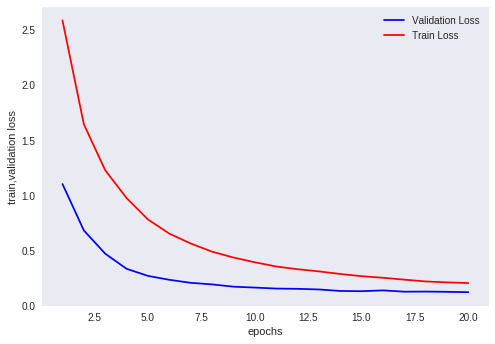

In [233]:
#train and validation error plot

fig,ax = plt.subplots(1,1)
epochs = list(range(1,n_epochs+1))
val_loss = hist.history['val_loss']
train_loss = hist.history['loss']
ax.set_xlabel('epochs'),ax.set_ylabel('train,validation loss')
plt_dynamic(epochs,val_loss,train_loss,ax)

In [234]:
#scores on test data

score = model_3.evaluate(x_test,y_test)
print('Test_Score',score[0])
print('Test_accuray',score[1])

10000/10000 [==============================] - 2s 234us/step
Test_Score 0.12404704682929442
Test_accuray 0.9734


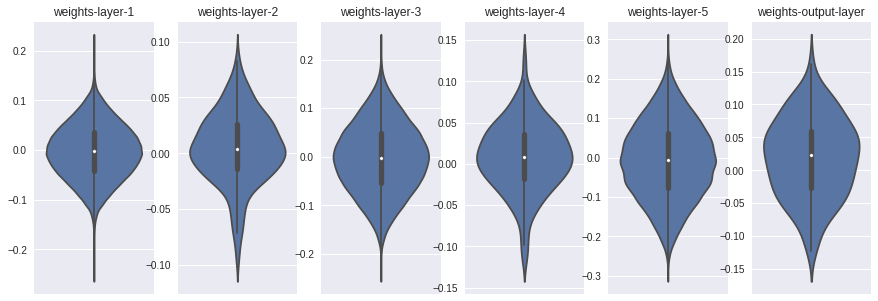

In [273]:
#plot the weights

weights = model_3.get_weights()
w1 = weights[0].flatten().reshape(-1,1)
w2 = weights[3].flatten().reshape(-1,1)
w3 = weights[6].flatten().reshape(-1,1)
w4 = weights[9].flatten().reshape(-1,1)
w5 = weights[12].flatten().reshape(-1,1)
w6 = weights[15].flatten().reshape(-1,1)

plt.figure(1,figsize=(15,5))
plt.subplot(1,6,1)
plt.title('weights-layer-1')

sn.violinplot(y=w1)
plt.subplot(1,6,2)
plt.title('weights-layer-2')

sn.violinplot(y=w2)

plt.subplot(1,6,3)
plt.title('weights-layer-3')

sn.violinplot(y=w3)

plt.subplot(1,6,4)
plt.title('weights-layer-4')

sn.violinplot(y=w4)

plt.subplot(1,6,5)
plt.title('weights-layer-5')
sn.violinplot(y=w5)

plt.subplot(1,6,6)
plt.title('weights-output-layer')
sn.violinplot(y=w6)

plt.show()

# Conclusion:

In [274]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Model','Hidden-Layers','Score','Accuracy']
x.add_row(['1','2','0.065','0.9811'])
x.add_row(['2','3','0.083','0.9753'])
x.add_row(['3','5','0.124','0.9734'])
print(x)

+-------+---------------+-------+----------+
| Model | Hidden-Layers | Score | Accuracy |
+-------+---------------+-------+----------+
|   1   |       2       | 0.065 |  0.9811  |
|   2   |       3       | 0.083 |  0.9753  |
|   3   |       5       | 0.124 |  0.9734  |
+-------+---------------+-------+----------+
